In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

In [261]:
cancer_data = load_breast_cancer()
sample = cancer_data.data

In [262]:
sample_df = pd.DataFrame(sample)
sample_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [263]:
cancer_labels = cancer_data.target

In [264]:
labels = np.reshape(cancer_labels, (569, 1))
final_data = np.concatenate([sample, labels], axis = 1)
final_data.shape

(569, 31)

In [265]:
cancer_dataset = pd.DataFrame(final_data)
features = cancer_data.feature_names

In [266]:
features_labels = np.append(features, 'label')
cancer_dataset.columns = features_labels
cancer_dataset.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0


In [267]:
#Separation of features and ground truths.
X = cancer_dataset.iloc[:, 0:30].values
Y = cancer_dataset.iloc[:, 30].values

In [268]:
# Splitting the data samples 80% train data and 20% test data.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [269]:
# We chose to scale after split as we want the outputs to be unscaled.

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test) # we use the same SD and Mean for both scaling.

In [270]:
# Logistic regression.

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [271]:
y_pred = reg.predict(x_test)
print(y_pred[0:3])

[0. 1. 1.]


In [272]:
# Checking the confusion matrix.

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[45,  2],
       [ 2, 65]], dtype=int64)

In [273]:
#Using "sklearn" library to check accuracy, precision, recall and F1 Score.

from sklearn import metrics
print("Accuracy: %.3f %%" %(metrics.accuracy_score(y_test, y_pred)*100))
print("Precision: %.3f %%" %(metrics.precision_score(y_test, y_pred)*100))
print("Recall: %.3f %%" %(metrics.recall_score(y_test, y_pred)*100))
print("F1 Score: %.3f %%" %(metrics.f1_score(y_test, y_pred, average='micro')*100)) # Global F1 score

Accuracy: 96.491 %
Precision: 97.015 %
Recall: 97.015 %
F1 Score: 96.491 %


Text(0.5, 427.9555555555555, 'Predicted label')

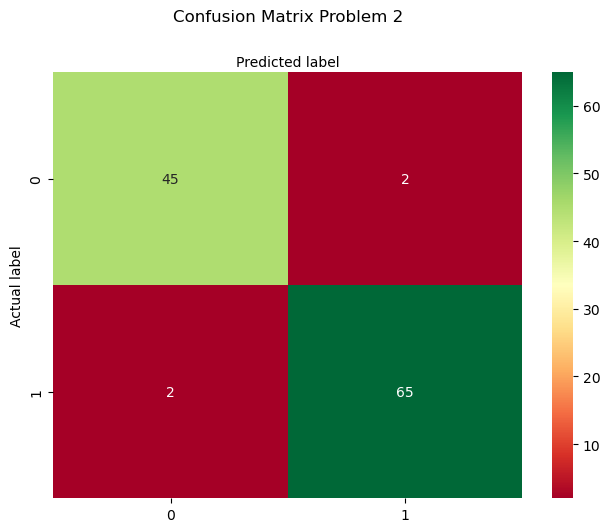

In [274]:
# Plotting the confusion matrix.
class_names=['Benign','Malignant'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="RdYlGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Problem 2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [275]:
C = [100, 10, 1, .1, .01]

for c in C:
    pen = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    pen.fit(x_train, y_train)
    print('C:', c)
    print('Training accuracy: %.3f %%' %(pen.score(x_train, y_train)*100))
    print('Test accuracy: %.3f %%' %(pen.score(x_test, y_test)*100))
    print('')

C: 100
Training accuracy: 99.560 %
Test accuracy: 94.737 %

C: 10
Training accuracy: 98.901 %
Test accuracy: 94.737 %

C: 1
Training accuracy: 99.121 %
Test accuracy: 95.614 %

C: 0.1
Training accuracy: 97.582 %
Test accuracy: 97.368 %

C: 0.01
Training accuracy: 92.747 %
Test accuracy: 92.105 %



In [276]:
# After the adding the weighted penalty 100 was chosen.
reg = LogisticRegression(penalty='l1', C=100, solver='liblinear')
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(y_pred[0:3])

[0. 1. 1.]


In [277]:
#Using "sklearn" library to check accuracy, precision, recall and F1 Score.

from sklearn import metrics
print("Accuracy: %.3f %%" %(metrics.accuracy_score(y_test, y_pred)*100))
print("Precision: %.3f %%" %(metrics.precision_score(y_test, y_pred)*100))
print("Recall: %.3f %%" %(metrics.recall_score(y_test, y_pred)*100))
print("F1 Score: %.3f %%" %(metrics.f1_score(y_test, y_pred, average='micro')*100)) # Global F1 score

Accuracy: 94.737 %
Precision: 96.923 %
Recall: 94.030 %
F1 Score: 94.737 %


In [278]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
confusion2 = confusion_matrix(y_test, y_pred)
confusion2

array([[45,  2],
       [ 4, 63]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

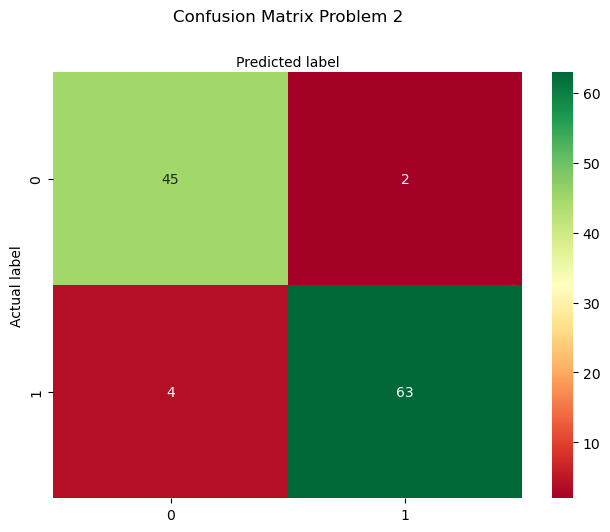

In [279]:
# Plotting the confusion matrix.
class_names=['Benign','Malignant'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion2), annot=True, cmap="RdYlGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Problem 2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')